<a href="https://colab.research.google.com/github/kabilan942/Hugging-Face/blob/main/Breast_Cancer_Classification_using_various_ML_Models.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Breast Cancer Classification using various Machine Learning Models**

## **Importing Libraries**

In [53]:
import numpy as np
import pandas as pd

from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.datasets import load_breast_cancer

## **Data Exploration and Pre-Processing**

In [54]:
bc_dataset = load_breast_cancer()

In [55]:
bc_dataset

{'data': array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
         1.189e-01],
        [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
         8.902e-02],
        [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
         8.758e-02],
        ...,
        [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
         7.820e-02],
        [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
         1.240e-01],
        [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
         7.039e-02]]),
 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
        0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
        1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
        1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
        1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0

In [56]:
bc_df = pd.DataFrame(bc_dataset['data'], columns = bc_dataset['feature_names'])

In [57]:
bc_df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [58]:
bc_df.shape

(569, 30)

In [59]:
# adding the 'target' column to the data frame (bc_df)
bc_df['label'] = bc_dataset.target

In [60]:
bc_df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,label
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [61]:
bc_df.shape

(569, 31)

In [62]:
bc_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

Checking for missing values:

In [63]:
bc_df.isnull().sum()

mean radius                0
mean texture               0
mean perimeter             0
mean area                  0
mean smoothness            0
mean compactness           0
mean concavity             0
mean concave points        0
mean symmetry              0
mean fractal dimension     0
radius error               0
texture error              0
perimeter error            0
area error                 0
smoothness error           0
compactness error          0
concavity error            0
concave points error       0
symmetry error             0
fractal dimension error    0
worst radius               0
worst texture              0
worst perimeter            0
worst area                 0
worst smoothness           0
worst compactness          0
worst concavity            0
worst concave points       0
worst symmetry             0
worst fractal dimension    0
label                      0
dtype: int64

In [64]:
bc_df.describe()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,label
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,0.627417
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,0.483918
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,0.000000
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,0.000000
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,1.000000
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,1.000000
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,1.000000


In [65]:
# checking the distribution of Target Variable
bc_df['label'].value_counts()

1    357
0    212
Name: label, dtype: int64

We have 357 cases of Benign (1) and 212 cases of Malignant(0)

In [66]:
bc_df.groupby('label').mean()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
label,,,,,,,,,,,,,,,,,,,,,
0,17.462830,21.604906,115.365377,978.376415,0.102898,0.145188,0.160775,0.087990,0.192909,0.062680,...,21.134811,29.318208,141.370330,1422.286321,0.144845,0.374824,0.450606,0.182237,0.323468,0.091530
1,12.146524,17.914762,78.075406,462.790196,0.092478,0.080085,0.046058,0.025717,0.174186,0.062867,...,13.379801,23.515070,87.005938,558.899440,0.124959,0.182673,0.166238,0.074444,0.270246,0.079442


In [67]:
# features
X = bc_df.drop(columns='label', axis=1)

# target
y = bc_df['label']

In [68]:
X.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [69]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: label, dtype: int64

In [70]:
# Splitting data into train and test data

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=7)

In [71]:
print('Shape of training feature matrix:', X_train.shape)
print('Shape of test feature matrix:', X_test.shape)
print('Shape of training target vector:', y_train.shape)
print('Shape of test target vector:', y_test.shape)

Shape of training feature matrix: (455, 30)
Shape of test feature matrix: (114, 30)
Shape of training target vector: (455,)
Shape of test target vector: (114,)


## **Model Training using Logistic Regression**

### **Model Training**

In [72]:
from sklearn.linear_model import LogisticRegression

lr_pipeline = Pipeline([('scaler', StandardScaler()),('lr', LogisticRegression())])
lr_pipeline.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()), ('lr', LogisticRegression())])

### **Model Evaluation**

In [73]:
from sklearn.metrics import accuracy_score

# Accuracy on training data

lr_train_pred = lr_pipeline.predict(X_train)
lr_train_accuracy = accuracy_score(y_train, lr_train_pred)

In [74]:
print('Accuracy on training data = {0:.3f}'.format(lr_train_accuracy))

Accuracy on training data = 0.985


In [75]:
# Accuracy on test data

lr_test_pred = lr_pipeline.predict(X_test)
lr_test_accuracy = accuracy_score(y_test, lr_test_pred)

In [76]:
print('Accuracy on test data = {0:.3f}'.format(lr_test_accuracy))

Accuracy on test data = 0.982


## **Model Training using Decision Tree**

### **Model Training** 

In [77]:
from sklearn.tree import DecisionTreeClassifier

dt_pipeline = Pipeline([('scaler', StandardScaler()),('dt', DecisionTreeClassifier())])
dt_pipeline.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()), ('dt', DecisionTreeClassifier())])

### **Model Evaluation** 

In [78]:
# Accuracy on training data

dt_train_pred = dt_pipeline.predict(X_train)
dt_train_accuracy = accuracy_score(y_train, dt_train_pred)

In [79]:
print('Accuracy on training data = {0:.3f}'.format(dt_train_accuracy))

Accuracy on training data = 1.000


In [80]:
# Accuracy on test data

dt_test_pred = dt_pipeline.predict(X_test)
dt_test_accuracy = accuracy_score(y_test, dt_test_pred)

In [81]:
print('Accuracy on test data = {0:.3f}'.format(dt_test_accuracy))

Accuracy on test data = 0.921


## **Model Training using Random Forest Classifier**

### **Model Training**

In [82]:
from sklearn.ensemble import RandomForestClassifier

rfc_model = RandomForestClassifier()

rfc_model.fit(X_train, y_train)

RandomForestClassifier()

### **Model Evaluation**

In [83]:
# Accuracy on training data

rfc_train_pred = rfc_model.predict(X_train)
rfc_train_accuracy = accuracy_score(y_train, rfc_train_pred)

In [84]:
print('Accuracy on training data = {0:.3f}'.format(rfc_train_accuracy))

Accuracy on training data = 1.000


In [85]:
# Accuracy on test data

rfc_test_pred = rfc_model.predict(X_test)
rfc_test_accuracy = accuracy_score(y_test, rfc_test_pred)

In [86]:
print('Accuracy on test data = {0:.3f}'.format(rfc_test_accuracy))

Accuracy on test data = 0.982


## **Model Training using Boosting**

### **Model Training** - with Gradient Boosting

In [87]:
from sklearn.ensemble import GradientBoostingClassifier

gbc_model = GradientBoostingClassifier()

gbc_model.fit(X_train, y_train)

GradientBoostingClassifier()

### **Model Evaluation** - with Gradient Boosting

In [88]:
# Accuracy on training data

gbc_train_pred = gbc_model.predict(X_train)
gbc_train_accuracy = accuracy_score(y_train, gbc_train_pred)

In [89]:
print('Accuracy on training data = {0:.3f}'.format(gbc_train_accuracy))

Accuracy on training data = 1.000


In [90]:
# Accuracy on test data

gbc_test_pred = gbc_model.predict(X_test)
gbc_test_accuracy = accuracy_score(y_test, gbc_test_pred)

In [91]:
print('Accuracy on test data = {0:.3f}'.format(gbc_test_accuracy))

Accuracy on test data = 0.974


## **Visualizing Accuracy of Models**

In [92]:
import matplotlib.pyplot as plt

In [93]:
model = ['Logistic Regression', 'Decision Tree', 'Random Forest Classifier', 'Boosting']
accuracy = [lr_test_accuracy, dt_test_accuracy, rfc_test_accuracy, gbc_test_accuracy]

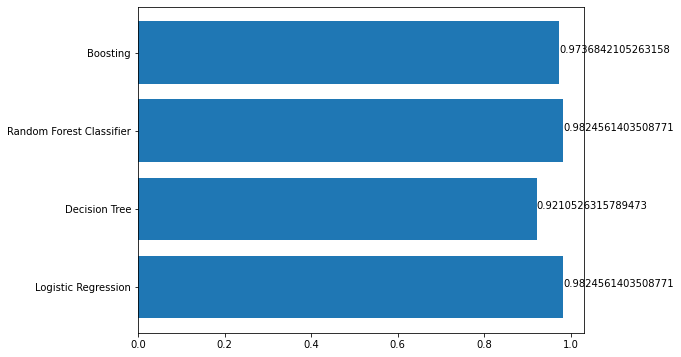

In [94]:
plt.barh(model, accuracy)
for index, value in enumerate(accuracy):
  plt.text(value, index, str(value))

plt.show()

Thus from the above Bar Plot, it is seen that the **Logistic Regression** and **Random Forest Classifier** models has the highest test accuracy score of **0.982456**.